In [31]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic
import scipy.stats as stats
import statsmodels.formula.api as smf

In [32]:
df = pd.read_csv("../data/GSS_414_Cleaned.csv")
df.head()

,year,id_,socfrend,satjob,satfin,mntlhlth,satself,afailure,slfrspct,ofworth,nogood,optimist,pessimst,notcount,moregood,owndoing,depndabl,hlth4,ballot
0,2004,4,7.0,4.0,1.0,15.0,1.0,4.0,3.0,1.0,4.0,2.0,3.0,3.0,2.0,2.0,1.0,2.0,Ballot b
1,2004,6,3.0,3.0,2.0,0.0,2.0,3.0,3.0,1.0,4.0,1.0,3.0,3.0,1.0,2.0,1.0,2.0,Ballot a
2,2004,7,4.0,4.0,2.0,5.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,1.0,2.0,2.0,2.0,2.0,Ballot c
3,2004,9,4.0,4.0,3.0,0.0,1.0,4.0,4.0,4.0,4.0,1.0,1.0,3.0,1.0,2.0,2.0,2.0,Ballot c
4,2004,15,6.0,3.0,2.0,0.0,2.0,4.0,4.0,1.0,4.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,Ballot a


In [33]:

# Create interaction term manually
df['interaction'] = df['socfrend'] * df['satself']

# Run the model
model = smf.ols('mntlhlth ~ socfrend + satself + interaction', data=df).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               mntlhlth   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     18.65
Date:                Sat, 26 Apr 2025   Prob (F-statistic):           1.06e-11
Time:                        18:02:37   Log-Likelihood:                -2645.4
No. Observations:                 802   AIC:                             5299.
Df Residuals:                     798   BIC:                             5318.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -3.9034      2.206     -1.769      

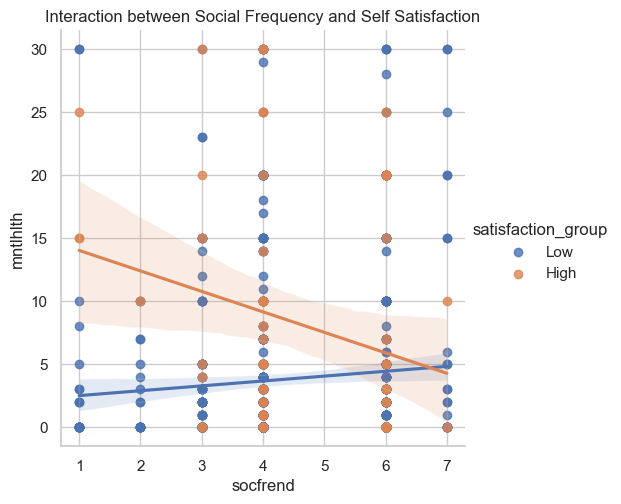

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bin self_satisfaction into low/high for plotting
df['satisfaction_group'] = pd.qcut(df['satself'], 2, labels=["Low", "High"])

sns.lmplot(x="socfrend", y="mntlhlth", hue="satisfaction_group", data=df)
plt.title("Interaction between Social Frequency and Self Satisfaction")
plt.show()


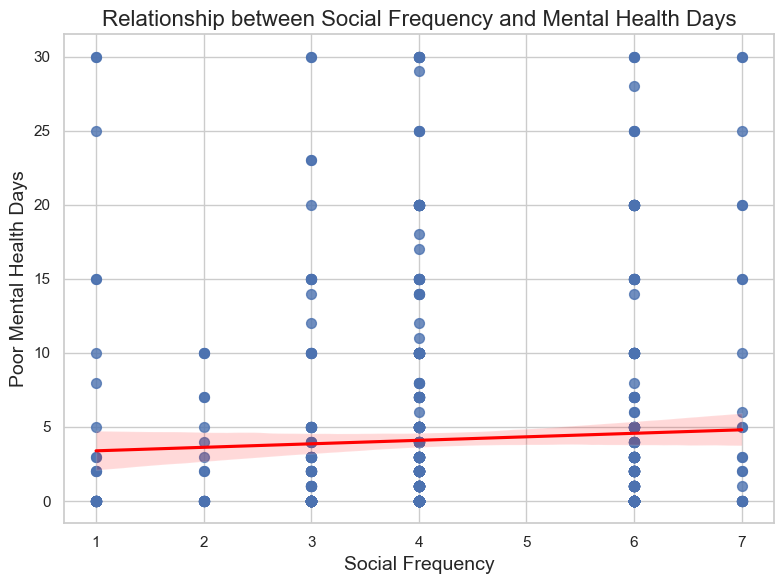

In [35]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.regplot(x='socfrend', y='mntlhlth', data=df, scatter_kws={"s": 50}, line_kws={"color": "red"})
plt.title("Relationship between Social Frequency and Mental Health Days", fontsize=16)
plt.xlabel("Social Frequency", fontsize=14)
plt.ylabel("Poor Mental Health Days", fontsize=14)
plt.tight_layout()
plt.show()

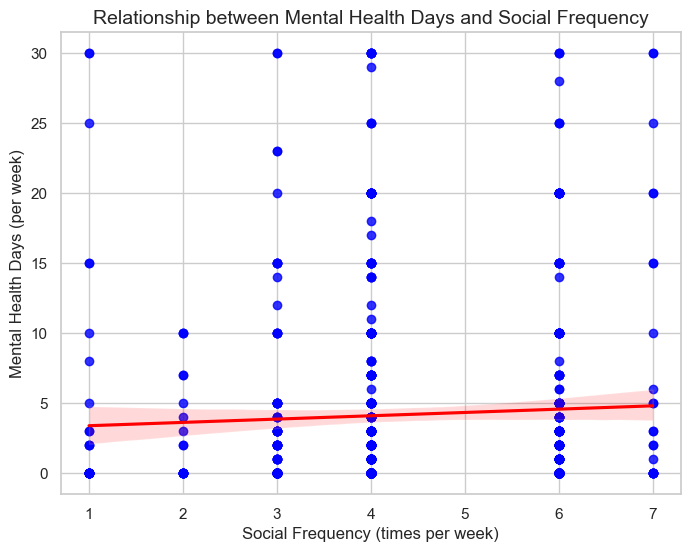

In [36]:
# Create the scatter plot of mental health days vs social frequency
plt.figure(figsize=(8, 6))
sns.regplot(x='socfrend', y='mntlhlth', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Title and labels
plt.title('Relationship between Mental Health Days and Social Frequency', fontsize=14)
plt.xlabel('Social Frequency (times per week)', fontsize=12)
plt.ylabel('Mental Health Days (per week)', fontsize=12)

# Show the plot
plt.show()